# Challenge 1

## Import all the libraries that are necessary

In [18]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)
'''
import numpy as np
import seaborn as sns
%matplotlib inline
'''

'\nimport numpy as np\nimport seaborn as sns\n%matplotlib inline\n'

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [21]:
fitbit=pd.read_csv('data/Fitbit2.csv')

fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


## Coding Session I

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

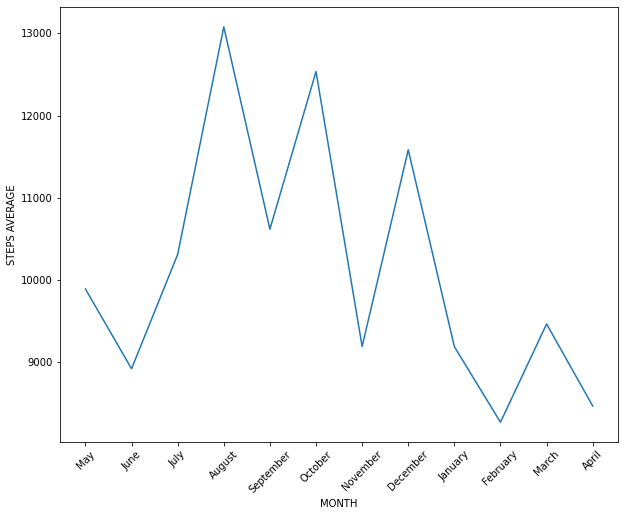

In [20]:
df_steps = fitbit.groupby('Months_encoded')['Steps'].mean().reset_index()

tabla_steps = plt.plot(df_steps["Months_encoded"],
                        df_steps["Steps"])


plt.xlabel("MONTH")
plt.ylabel("STEPS AVERAGE")
meses = fitbit['Months'].unique()
plt.xticks(df_steps["Months_encoded"], meses, rotation=45);

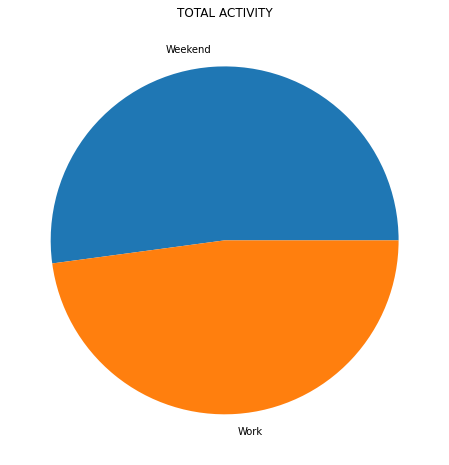

In [48]:
df_activity = fitbit
df_activity['Total Activity'] = (df_activity['Minutes Lightly Active'] + 
                                df_activity['Minutes Fairly Active'] + 
                                df_activity['Minutes Very Active'])

df_activity = pd.DataFrame(df_activity.groupby('Work_or_Weekend')['Total Activity'].mean()).reset_index()

plt.title('TOTAL ACTIVITY')
labels_pie = ['Weekend','Work']
tabla_activity = plt.pie(df_activity['Total Activity'],
                        labels=labels_pie);

# It's slighly mor active on weekends

## Coding Session II 

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

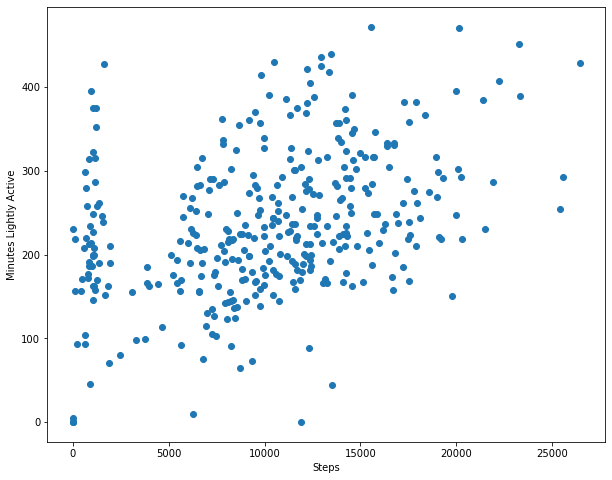

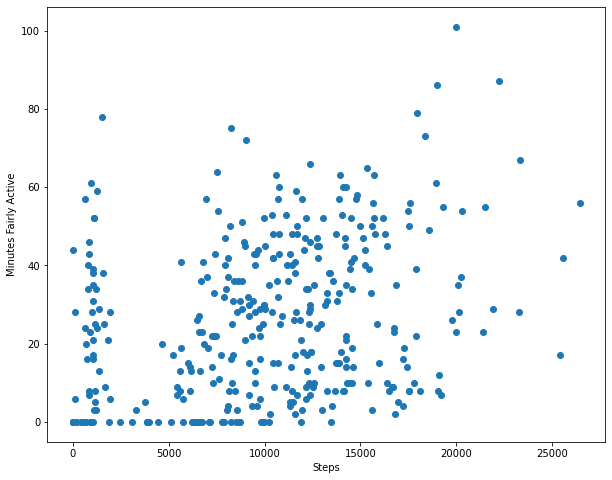

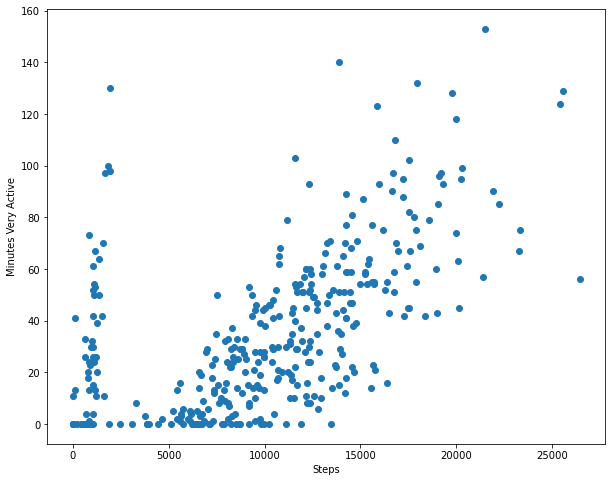

In [61]:
quedan = ['Steps', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']
columnas = ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']
df_activity_steps = fitbit[quedan]
df_activity_steps.head(5)

for i in columnas:
    tabla_activity_steps = plt.scatter(df_activity_steps['Steps'], df_activity_steps[i])
    plt.xlabel('Steps')
    plt.ylabel(i);
    plt.show()
    